# Python for Data Science
## Session 7
### Datasets – Pandas II

---

## Outline

1. Lambda and map

2. Series

2. Advanced data manipulation 

3. Handling missing data and data transformation 

---

## Pandas II 
### Lambda and map

A **Lambda** function is an anonymous tranformation. It is a **pure** function, since the output only depends on the input, with no side effects. ts syntax can be expressed as:
</p>

<center> <font color='blue'>lambda</font> arguments : expression</center> 

</p>

### Regular function

In [2]:
def square(x):
    return x * x

### Equivalent lambda transformation

In [3]:
square_lambda = lambda x: x * x #doing the same as in the line above
square_lambda(5)

25

In [4]:
add = lambda x, y: x + y
add(3,4)

7

In [5]:
students =[('Leo', 99), ('Marçal', 100), ('Javier', 85)]
students.sort(key = lambda x: x[1], reverse = True)     #The reverse would put it in reverse, the x[1] indicates if we're sorting by grade or by name
students

[('Marçal', 100), ('Leo', 99), ('Javier', 85)]

## Pandas II
### Lambda and map

Although we can used regular functions, as we saw in the last session, with **apply**, **lambda** tends to be the usual choice for one-off transformations.

In [6]:
import pandas as pd
df = pd.DataFrame({'col': [1, 0, 4, 2, 5]})
df

,col
0,1
1,0
2,4
3,2
4,5


In [7]:
df['col'] = df['col'].apply(lambda x: x * x)
df

,col
0,1
1,0
2,16
3,4
4,25


## Pandas II

### Lambda and map

On the other side, **map**, is another option, originally created for **series** to perform one-to-one transformations. It is supposed to be faster than **apply**. For those familiar with **applymap**, note that this method will be deprecated in future versions.

In [8]:
#Apply is more for one section, and map is for all dataframe
import numpy as np
import time

apply_values = []
map_values = []
for _ in range(10):
    df = pd.DataFrame({'col': np.random.randn(1000000)})
    ts = time.time()
    df['col'].apply(lambda x: x * x)
    apply_values.append(time.time() - ts)
    
    ts = time.time()
    df['col'].map(lambda x: x * x)
    map_values.append(time.time() - ts)
    
print(f"Apply: it took for 1M values {np.mean(apply_values)} seconds.")
print(f"Map: it took for 1M values {np.mean(map_values)} seconds.")

Apply: it took for 1M values 0.2321824312210083 seconds.
Map: it took for 1M values 0.24244377613067628 seconds.


## Pandas II
### series

Let's jump into **series**. As we roughly mentioned in the last session, they are mainly used for time series and 1D observations. 

In [9]:
s = pd.Series([np.random.randint(0, 100 + 1) for _ in range(100)])
s.map(lambda x: x - 100).head(10) # s.apply(lambda x: x - 100) 

0   -59
1   -35
2   -63
3   -19
4   -15
5   -52
6   -78
7   -34
8   -96
9   -81
dtype: int64

In [10]:
s.map(lambda x: x-100 if x > 50 else x + 100).head(10)

0    141
1    -35
2    137
3    -19
4    -15
5    148
6    122
7    -34
8    104
9    119
dtype: int64

In [11]:
s = s - 100 # we can also perform easy operations over the whole series
s.head(4)

0   -59
1   -35
2   -63
3   -19
dtype: int64

In [12]:
s = pd.Series([1, 2, 3, 4])
s.map({1: 'A', 2: 'B'}) # replace values using a dictionary with Map

0      A
1      B
2    NaN
3    NaN
dtype: object

## Pandas II
### Series

Another cool method we can call is **rolling** which performs a sliding window over the whole series

In [13]:
s = pd.Series([1, 20, 300, 4000])
s.rolling(window=2).mean()  # 2-period rolling mean, performs the medium between 1 and 20, 20 and 300 etc

0       NaN
1      10.5
2     160.0
3    2150.0
dtype: float64

## Pandas II
### Advanced data manipulation

Some methods we can use with **series** and **dataframes** are:

- value_counts
- drop_duplicates

Values counts provide a fast way of exploring and handling your data

In [14]:
df = pd.DataFrame({
    'student': ['Ludmila', 'Laura', 'Gerardo', 'Antonio', 'Manuel', 'Frank', 'Marco', 'Victor', 'Laura'],
    'program': ['doctoral', 'master', 'post-doctoral', 'doctoral', 'master', 'doctoral', 'post-doctoral', 'doctoral', 'master']
})
df

,student,program
0,Ludmila,doctoral
1,Laura,master
2,Gerardo,post-doctoral
3,Antonio,doctoral
4,Manuel,master
5,Frank,doctoral
6,Marco,post-doctoral
7,Victor,doctoral
8,Laura,master


In [15]:
df['program'].value_counts() #sees how many times the program is accounted

program
doctoral         4
master           3
post-doctoral    2
Name: count, dtype: int64

We can also drop duplicates based on all the columns

In [16]:
#however, we are counting laura as two different people.
#this drops the duplicates
df.drop_duplicates()['program'].value_counts()

program
doctoral         4
master           2
post-doctoral    2
Name: count, dtype: int64

We can also remove duplicates based on specific columns

In [17]:
df = pd.DataFrame({
    'student': ['Ludmila', 'Laura', 'Gerardo', 'Antonio', 'Ludmila'],
    'program': ['doctoral', 'master', 'post-doctoral', 'doctoral', 'doctoral'],
    'year': [2019, 2017, 2021, 2023, 2017]
})
df


,student,program,year
0,Ludmila,doctoral,2019
1,Laura,master,2017
2,Gerardo,post-doctoral,2021
3,Antonio,doctoral,2023
4,Ludmila,doctoral,2017


In [18]:
df.drop_duplicates(subset=['student', 'program'])#this drops the duplicates only considering student and program

,student,program,year
0,Ludmila,doctoral,2019
1,Laura,master,2017
2,Gerardo,post-doctoral,2021
3,Antonio,doctoral,2023


We can also select which one to remove based on its appearance, **first** or **last**, or even drastically remove all of them by setting **keep** to **False**:

In [19]:
df = pd.DataFrame({
    'student': ['Ludmila', 'Laura', 'Gerardo', 'Antonio', 'Ludmila'],
    'program': ['doctoral', 'master', 'post-doctoral', 'doctoral', 'doctoral'],
    'year': [2019, 2017, 2021, 2023, 2017]
})
df

,student,program,year
0,Ludmila,doctoral,2019
1,Laura,master,2017
2,Gerardo,post-doctoral,2021
3,Antonio,doctoral,2023
4,Ludmila,doctoral,2017


In [20]:
df.drop_duplicates(subset=['student', 'program'], keep='last').reset_index(inplace = True) # keep = False will remove all

In [21]:
#we might need to reset the indexes when removing duplicates
df.reset_index(inplace=True)
df

,index,student,program,year
0,0,Ludmila,doctoral,2019
1,1,Laura,master,2017
2,2,Gerardo,post-doctoral,2021
3,3,Antonio,doctoral,2023
4,4,Ludmila,doctoral,2017


As we mentioned in the last session, we can modify a column type. This can be an option for optimising resources. What we did not see is that we can simply call it once to modify multiple at the same time:

In [22]:
df.astype({'year': np.int16, 'student': 'S10'}).info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    5 non-null      int64 
 1   student  5 non-null      |S10  
 2   program  5 non-null      object
 3   year     5 non-null      int16 
dtypes: bytes80(1), int16(1), int64(1), object(1)
memory usage: 272.0+ bytes


It may happen that some errors occur

In [23]:
df = pd.DataFrame({
    'student': ['Ludmila', 'Laura'],
    'program': ['doctoral', 'master'],
    'id': ['1232', 'ABDD'],
    'year': [2019, 2017]
})
# ignore will leave as it was
df.astype({'id': float}, errors='ignore') 

,student,program,id,year
0,Ludmila,doctoral,1232,2019
1,Laura,master,ABDD,2017


If you want to still change the column type, and handle them in a specific way, you can use the following:

In [24]:
pd.to_numeric(df['id'], errors='coerce') # Ideally, you can use to_numeric. If it's a string it just converts it to a NaN

0    1232.0
1       NaN
Name: id, dtype: float64

## Pandas II
### Advanced data manipulation

Let's do some exercices with what we learned so far. The Iris dataset can be found in: 

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

Exercise:

- Series
    - Create a **lambda** function that classifies flowers based on their petal length (e.g., "short" for petal lengths less than 3 cm and "long" for others). Apply this function to the PetalLengthCm column using **apply**.
    - Use **map** to convert the *Species* column into numeric values, e.g. 0 for *Iris-setosa*, 1 for *Iris-versicolor*, 2 for *Iris-virginica*.
- DataFrame
    - Use **value_counts** on the *Species* column to count how many entries belong to each species.
    - Use **drop_duplicates** to remove any duplicate rows from the dataset based on SepalLengthCm and PetalLengthCm.
    - Use **astype** to convert the *SepalLengthCm* column to a string type, then back to float type (if there are any errors, handle them gracefully).
    - Save the modified DataFrame to a CSV file ensuring the index is included (use **to_csv**).

In [26]:
# Additional information to succeed in the exercises

columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# Since the dataset does not come with header... we set up the columns with the above information
df = pd.read_csv(url, header=None, names=columns)

In [27]:
#Create a **lambda** function that classifies flowers based on their petal length 

classifier = lambda x: 'short' if x<3 else 'long'
df['PetalLenghtCm'] = df['PetalLengthCm'].apply(classifier)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalLenghtCm
0,5.1,3.5,1.4,0.2,Iris-setosa,short
1,4.9,3.0,1.4,0.2,Iris-setosa,short
2,4.7,3.2,1.3,0.2,Iris-setosa,short
3,4.6,3.1,1.5,0.2,Iris-setosa,short
4,5.0,3.6,1.4,0.2,Iris-setosa,short
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,long
146,6.3,2.5,5.0,1.9,Iris-virginica,long
147,6.5,3.0,5.2,2.0,Iris-virginica,long
148,6.2,3.4,5.4,2.3,Iris-virginica,long


In [28]:
#Use **map** to convert the *Species* column into numeric values

df['Species'].map(lambda x: 0 if x=='Iris-setosa' else (1 if x == 'Iris-versicolor' else 2 if x=='Iris-virginica' else None))

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [29]:
#Use **value_counts** on the *Species* column to count how many entries belong to each species

df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [30]:
#Use **drop_duplicates** to remove any duplicate rows from the dataset based on SepalLengthCm and PetalLengthCm

df.drop_duplicates(subset = ['SepalLengthCm', 'PetalLengthCm'])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalLenghtCm
0,5.1,3.5,1.4,0.2,Iris-setosa,short
1,4.9,3.0,1.4,0.2,Iris-setosa,short
2,4.7,3.2,1.3,0.2,Iris-setosa,short
3,4.6,3.1,1.5,0.2,Iris-setosa,short
4,5.0,3.6,1.4,0.2,Iris-setosa,short
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,long
146,6.3,2.5,5.0,1.9,Iris-virginica,long
147,6.5,3.0,5.2,2.0,Iris-virginica,long
148,6.2,3.4,5.4,2.3,Iris-virginica,long


In [31]:
#Use **astype** to convert the *SepalLengthCm* column to a string type, then back to float type

df.astype({'SepalLengthCm': str}, errors='ignore').info()
df.astype({'SepalLengthCm': float}, errors='ignore').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    object 
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
 5   PetalLenghtCm  150 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
 5   PetalLenghtCm  150 non-null    object 
dtypes: float64(4), object(2)
memory

In [32]:
# Save the modified DataFrame to a CSV

df.to_csv(r'DataFrame.csv')

## Pandas II
### Advanced data manipulation

As we saw last session, **groupby** is a pretty handy tool. Another useful tool is **pivot_table**. It provides  statistics of a more extensive data table. 

In [33]:
df = pd.DataFrame({
    'student': ['Ludmila', 'Laura', 'Gerardo', 'Antonio', 'Manuel', 'Frank', 'Marco', 'Victor', 'Victor'],
    'program': ['doctoral', 'master', 'post-doctoral', 'doctoral', 'master', 'doctoral', 'post-doctoral', 'doctoral', 'doctoral'],
    'grades': ['B', 'A', 'F', 'C', 'C', 'B', 'B', 'A', 'B'],
    'marks':  [8, 10, 4, 5, 5, 8, 8, 9, 7]
})
df

,student,program,grades,marks
0,Ludmila,doctoral,B,8
1,Laura,master,A,10
2,Gerardo,post-doctoral,F,4
3,Antonio,doctoral,C,5
4,Manuel,master,C,5
5,Frank,doctoral,B,8
6,Marco,post-doctoral,B,8
7,Victor,doctoral,A,9
8,Victor,doctoral,B,7


In [34]:
df.pivot_table(values='marks', index='program') # it will by default use mean

,marks
program,
doctoral,7.4
master,7.5
post-doctoral,6.0


In [35]:
df.pivot_table(values='marks', index='program', aggfunc='max')

,marks
program,
doctoral,9
master,10
post-doctoral,8


In [36]:
# here it does not make sense to use index = student, 
# since we don't have multile entries per student
df.pivot_table(values='marks', index='student', aggfunc=['sum', 'mean', 'max'])

,sum,mean,max
,marks,marks,marks
student,,,
Antonio,5,5,5
Frank,8,8,8
Gerardo,4,4,4
Laura,10,10,10
Ludmila,8,8,8
Manuel,5,5,5
Marco,8,8,8
Victor,16,8,9


## Pandas II
### Advanced data manipulation

Another interesting method we can use within **Pandas** is **query**. It can help us exploring in a neat manner:


In [37]:
df = pd.DataFrame({
    'student': ['Ludmila', 'Laura', 'Gerardo', 'Antonio', 'Manuel', 'Frank', 'Marco', 'Victor'],
    'program': ['doctoral', 'master', 'post-doctoral', 'doctoral', 'master', 'doctoral', 'post-doctoral', 'doctoral'],
    'grades': ['B', 'A', 'F', 'C', 'C', 'B', 'B', 'A'],
    'marks':  [8, 10, 4, 5, 5, 7.8, 8, 9]
})

In [38]:
df.query('marks >= 8 and grades in ["B", "A"]') 

,student,program,grades,marks
0,Ludmila,doctoral,B,8.0
1,Laura,master,A,10.0
6,Marco,post-doctoral,B,8.0
7,Victor,doctoral,A,9.0


It's equivalent without query

In [39]:
df[(df['marks'] >= 8) & (df['grades'].isin(['B', 'A']))] #grades are B or A and marks are bigger than 8, but query is more recomendable

,student,program,grades,marks
0,Ludmila,doctoral,B,8.0
1,Laura,master,A,10.0
6,Marco,post-doctoral,B,8.0
7,Victor,doctoral,A,9.0


## Pandas II
### Advanced data manipulation

Similar to SQL, we can also **merge** and **join** dataframes based on a specific column:

<table border="1" style="border-collapse: collapse; width: 90%;">
  <tr>
    <th style="text-align: center;">Operation</th>
    <th style="text-align: center;">Ideal For</th>
    <th style="text-align: center;">Joins on</th>
    <th style="text-align: center;">Syntax</th>
  </tr>
  <tr>
    <td style="text-align: center;"><b>merge</b></td>
    <td style="text-align: center;">Column-based joins</td>
    <td style="text-align: center;">Columns or indexes</td>
    <td style="text-align: center;"><code>pd.merge(df1, df2, on='col')</code></td>
  </tr>
  <tr>
    <td style="text-align: center;"><b>join</b></td>
    <td style="text-align: center;">Index-based joins</td>
    <td style="text-align: center;">Index alignment</td>
    <td style="text-align: center;"><code>df1.join(df2, on='index_col')</code></td>
  </tr>
</table>


In [40]:
#two different data frames
df = pd.DataFrame({
    'student': ['Ludmila', 'Laura', 'Gerardo', 'Antonio', 'Manuel', 'Frank', 'Marco', 'Victor'],
    'program': ['doctoral', 'master', 'post-doctoral', 'doctoral', 'master', 'doctoral', 'post-doctoral', 'bachelor'],
    'grades': ['B', 'A', 'F', 'C', 'C', 'B', 'B', 'A'],
    'marks':  [8, 10, 4, 5, 5, 7.8, 8, 9]
})


program_info = pd.DataFrame({
    'program': ['doctoral', 'master', 'post-doctoral', 'pre-doctoral'],
    'duration': ['5 years', '2 years', '3 years', '1 year'],
})

In [41]:
pd.merge(df, program_info, on='program', how='inner') # merge them using inner, we also have left, right, full join

#on is a column that's the same in both dataframes

,student,program,grades,marks,duration
0,Ludmila,doctoral,B,8.0,5 years
1,Antonio,doctoral,C,5.0,5 years
2,Frank,doctoral,B,7.8,5 years
3,Laura,master,A,10.0,2 years
4,Manuel,master,C,5.0,2 years
5,Gerardo,post-doctoral,F,4.0,3 years
6,Marco,post-doctoral,B,8.0,3 years


In [42]:
pd.merge(df, program_info, on='program', how='left') # merge them using left

,student,program,grades,marks,duration
0,Ludmila,doctoral,B,8.0,5 years
1,Laura,master,A,10.0,2 years
2,Gerardo,post-doctoral,F,4.0,3 years
3,Antonio,doctoral,C,5.0,5 years
4,Manuel,master,C,5.0,2 years
5,Frank,doctoral,B,7.8,5 years
6,Marco,post-doctoral,B,8.0,3 years
7,Victor,bachelor,A,9.0,NaN


In [43]:
pd.merge(df, program_info, on='program', how='right') # merge them using left

,student,program,grades,marks,duration
0,Ludmila,doctoral,B,8.0,5 years
1,Antonio,doctoral,C,5.0,5 years
2,Frank,doctoral,B,7.8,5 years
3,Laura,master,A,10.0,2 years
4,Manuel,master,C,5.0,2 years
5,Gerardo,post-doctoral,F,4.0,3 years
6,Marco,post-doctoral,B,8.0,3 years
7,NaN,pre-doctoral,NaN,NaN,1 year


In [44]:
pd.merge(df, program_info, on='program', how='outer') # merge them using outer

,student,program,grades,marks,duration
0,Ludmila,doctoral,B,8.0,5 years
1,Antonio,doctoral,C,5.0,5 years
2,Frank,doctoral,B,7.8,5 years
3,Laura,master,A,10.0,2 years
4,Manuel,master,C,5.0,2 years
5,Gerardo,post-doctoral,F,4.0,3 years
6,Marco,post-doctoral,B,8.0,3 years
7,Victor,bachelor,A,9.0,NaN
8,NaN,pre-doctoral,NaN,NaN,1 year


We can do similar with **join** as we do for **merge**.

In [45]:
df = pd.DataFrame({
    'student': ['Ludmila', 'Laura', 'Gerardo', 'Antonio', 'Manuel', 'Frank', 'Marco', 'Victor'],
    'program': ['doctoral', 'master', 'post-doctoral', 'doctoral', 'master', 'doctoral', 'post-doctoral', 'bachelor'],
    'grades': ['B', 'A', 'F', 'C', 'C', 'B', 'B', 'A'],
    'marks':  [8, 10, 4, 5, 5, 7.8, 8, 9]
})


program_info = pd.DataFrame({
    'program': ['doctoral', 'master', 'post-doctoral', 'pre-doctoral'],
    'duration': ['5 years', '2 years', '3 years', '1 year'],
})

program_info.set_index('program', inplace=True)
df.join(program_info, on='program', how='inner')

,student,program,grades,marks,duration
0,Ludmila,doctoral,B,8.0,5 years
3,Antonio,doctoral,C,5.0,5 years
5,Frank,doctoral,B,7.8,5 years
1,Laura,master,A,10.0,2 years
4,Manuel,master,C,5.0,2 years
2,Gerardo,post-doctoral,F,4.0,3 years
6,Marco,post-doctoral,B,8.0,3 years


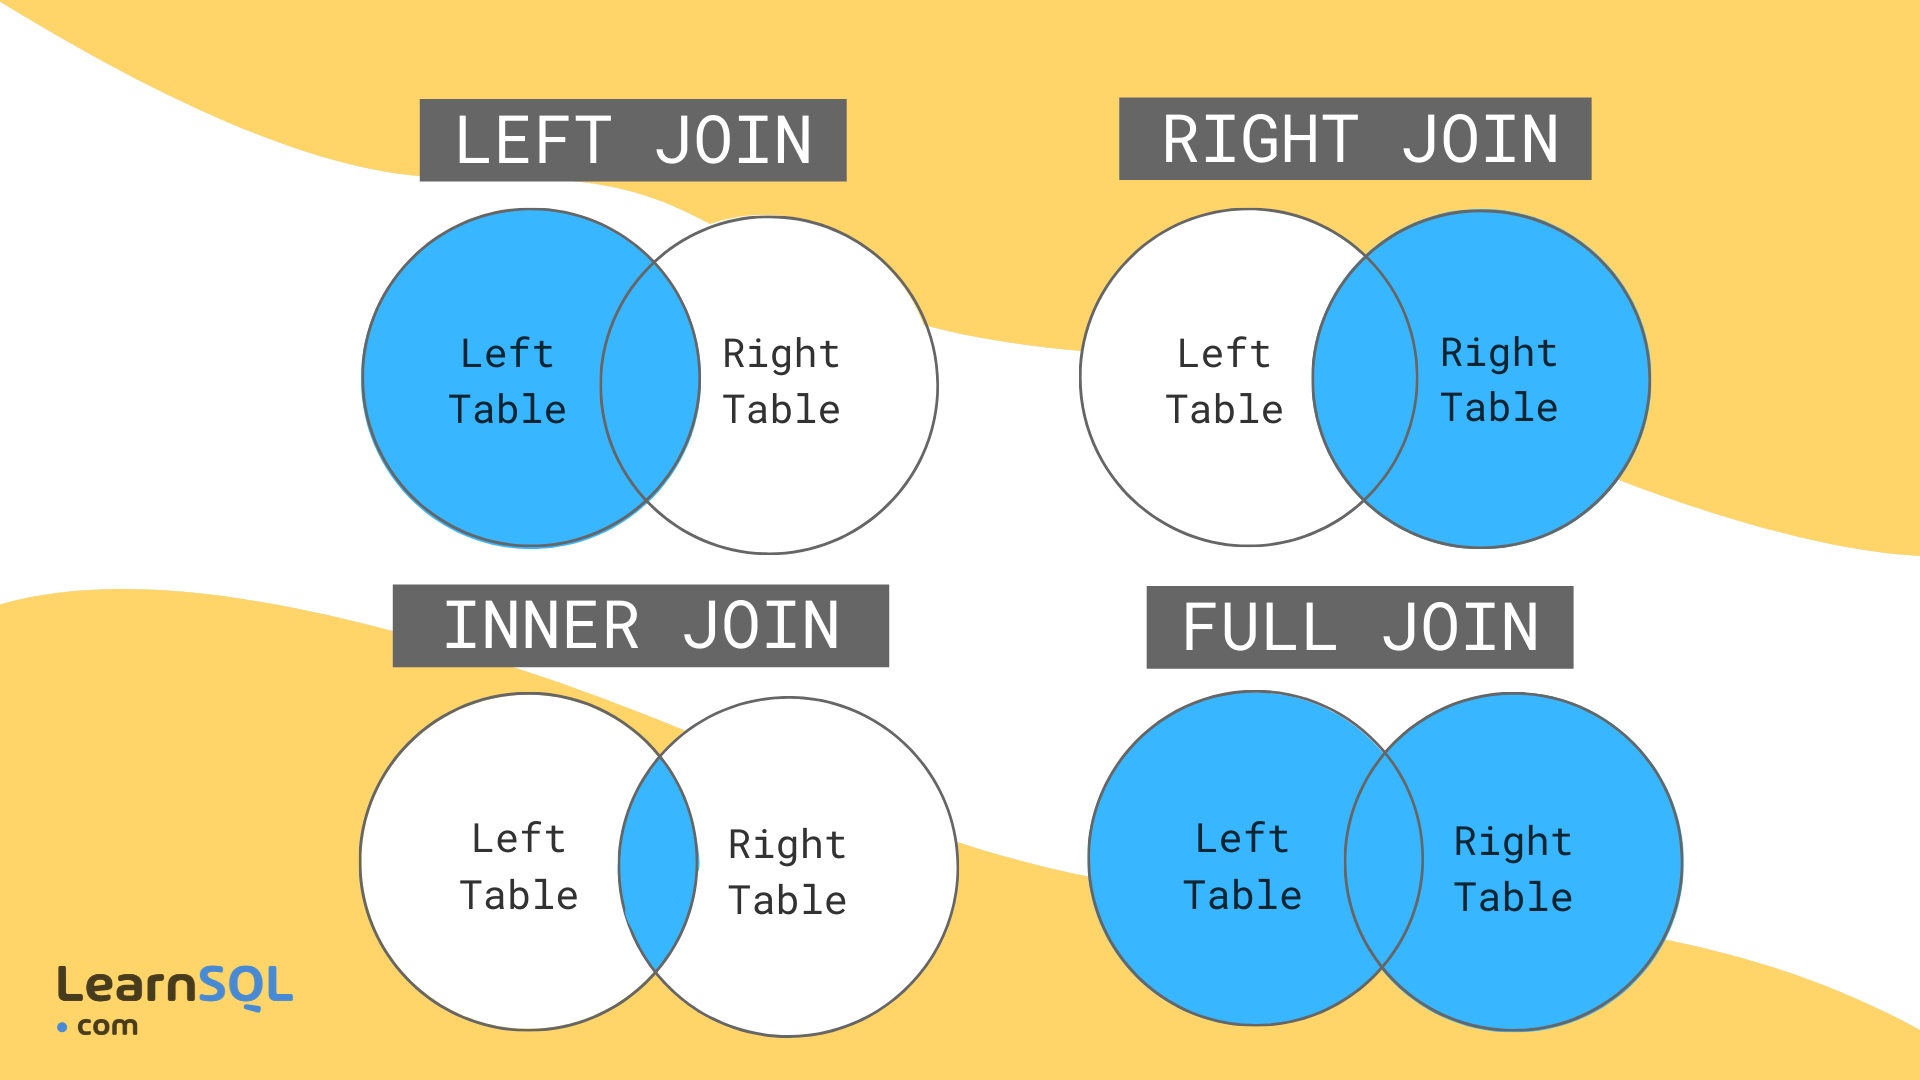

## Pandas II
### Advanced data manipulation

Another thing we can do with **pandas** consists in setting up, accessing, and slicing multi-level indices.


Setting up multi-level index:

In [46]:
df = pd.DataFrame({
    'student': ['Ludmila', 'Laura', 'Gerardo', 'Antonio', 'Manuel', 'Frank', 'Marco', 'Victor'],
    'program': ['doctoral', 'master', 'post-doctoral', 'doctoral', 'master', 'doctoral', 'post-doctoral', 'bachelor'],
    'grades': ['B', 'A', 'F', 'C', 'C', 'B', 'B', 'A'],
    'marks':  [8, 10, 4, 5, 5, 7.8, 8, 9]
})


#if we have repeated values and then p

df.set_index(['program', 'grades'], inplace=True)
df

,,student,marks
program,grades,,
doctoral,B,Ludmila,8.0
master,A,Laura,10.0
post-doctoral,F,Gerardo,4.0
doctoral,C,Antonio,5.0
master,C,Manuel,5.0
doctoral,B,Frank,7.8
post-doctoral,B,Marco,8.0
bachelor,A,Victor,9.0


Once, set up, we can use **loc**:

In [47]:
df.loc[('doctoral')] # we may have some warning here, this is like a filter

,student,marks
grades,,
B,Ludmila,8.0
C,Antonio,5.0
B,Frank,7.8


In [48]:
df.loc['doctoral'] # we can access by the top level

,student,marks
grades,,
B,Ludmila,8.0
C,Antonio,5.0
B,Frank,7.8


In [49]:
idx = pd.IndexSlice
idx

In [ ]:
idx['doctoral', 'B':'C']
df.loc[idx['doctoral', 'B':'C'], :] # this is gonna raise an error

UnsortedIndexError: 'MultiIndex slicing requires the index to be lexsorted: slicing on levels [1], lexsort depth 0'

In [50]:
df = df.sort_index() # we sort 
df.loc[idx['doctoral', 'B':'C'], :] # it's no longer raising an error

student  marks
program  grades                
doctoral B       Ludmila    8.0
         B         Frank    7.8
         C       Antonio    5.0

And, of course, we can reset index:

In [51]:
df.reset_index(inplace=True)
df

,program,grades,student,marks
0,bachelor,A,Victor,9.0
1,doctoral,B,Ludmila,8.0
2,doctoral,B,Frank,7.8
3,doctoral,C,Antonio,5.0
4,master,A,Laura,10.0
5,master,C,Manuel,5.0
6,post-doctoral,B,Marco,8.0
7,post-doctoral,F,Gerardo,4.0


## Pandas II
### Handling Missing Data and Data Transformation

From here, we will quickly see other ways of replacing missing data and string manipulation.

In [52]:
df = pd.DataFrame({
    'student': ['Ludmila', 'Laura', 'Gerardo', 'Antonio', 'Manuel', 'Frank', 'Marco', 'Victor'],
    'program': ['doctoral', 'master', 'post-doctoral', 'doctoral', 'master', 'doctoral', 'post-doctoral', 'bachelor'],
    'grades': ['B', 'A', np.nan, 'C', 'C', np.nan, 'B', 'A'],
    'marks':  [8, 10, 4, 5, 5, 7.8, 8, 9]
})

Forward filling, using the current value to fill the next missing one

In [53]:
df['new_grades'] = df['grades'].ffill()
df

,student,program,grades,marks,new_grades
0,Ludmila,doctoral,B,8.0,B
1,Laura,master,A,10.0,A
2,Gerardo,post-doctoral,NaN,4.0,A
3,Antonio,doctoral,C,5.0,C
4,Manuel,master,C,5.0,C
5,Frank,doctoral,NaN,7.8,C
6,Marco,post-doctoral,B,8.0,B
7,Victor,bachelor,A,9.0,A


Backward filling, using the next value to fill the missing one

In [54]:
df['new_grades'] = df['grades'].bfill()
df

,student,program,grades,marks,new_grades
0,Ludmila,doctoral,B,8.0,B
1,Laura,master,A,10.0,A
2,Gerardo,post-doctoral,NaN,4.0,C
3,Antonio,doctoral,C,5.0,C
4,Manuel,master,C,5.0,C
5,Frank,doctoral,NaN,7.8,B
6,Marco,post-doctoral,B,8.0,B
7,Victor,bachelor,A,9.0,A


In [55]:
df['grades'].fillna('F') # of course, we can use the one we learned in session 6

0    B
1    A
2    F
3    C
4    C
5    F
6    B
7    A
Name: grades, dtype: object

Another possibility is to provide a grade map and fill the missing values using other columns, something that can certainly happen when manipulatin data.

In [56]:
df = pd.DataFrame({
    'student': ['Ludmila', 'Laura', 'Gerardo', 'Antonio', 'Manuel', 'Frank', 'Marco', 'Victor'],
    'program': ['doctoral', 'master', 'post-doctoral', 'doctoral', 'master', 'doctoral', 'post-doctoral', 'bachelor'],
    'grades': ['B', 'A', np.nan, 'C', 'C', np.nan, 'B', 'A'],
    'marks':  [8, 10, 4, 5, 5, 7, 8, 9]
})

In [57]:
grade_map = {10: 'A', 9: 'A', 8: 'B', 7: 'B', 6: 'C', 5: 'C', 4: 'F', 3: 'F'}
df['grades_numeric'] = df['marks'].map(grade_map) # we can fill missing values relying on other columns
df

,student,program,grades,marks,grades_numeric
0,Ludmila,doctoral,B,8,B
1,Laura,master,A,10,A
2,Gerardo,post-doctoral,NaN,4,F
3,Antonio,doctoral,C,5,C
4,Manuel,master,C,5,C
5,Frank,doctoral,NaN,7,B
6,Marco,post-doctoral,B,8,B
7,Victor,bachelor,A,9,A


Another way is to interpolate:

In [58]:
df = pd.DataFrame({
    'student': ['Ludmila', 'Laura', 'Gerardo', 'Antonio', 'Manuel', 'Frank', 'Marco', 'Victor'],
    'program': ['doctoral', 'master', 'post-doctoral', 'doctoral', 'master', 'doctoral', 'post-doctoral', 'bachelor'],
    'grades': ['B', 'A', np.nan, 'C', 'C', 'B', 'B', np.nan],
    'marks':  [8, 10, np.nan, 5, 5, 7, 8, np.nan]
})
df['marks'].interpolate(method='cubicspline') # this won't work for categorical data like letter grades

0     8.000000
1    10.000000
2     7.691589
3     5.000000
4     5.000000
5     7.000000
6     8.000000
7     4.635514
Name: marks, dtype: float64

In [59]:
df = pd.DataFrame({
    'student': ['Ludmila', 'Laura', 'Gerardo', 'Antonio', 'Manuel', 'Frank', 'Marco', 'Victor'],
    'program': ['doctoral', 'master', 'post-doctoral', 'doctoral', 'master', 'doctoral', 'post-doctoral', 'bachelor'],
    'grades': ['B', 'A', np.nan, 'C', 'C', 'B', 'B', np.nan],
    'marks':  [8, 10, np.nan, 5, 5, 7, 8, np.nan]
})

In [60]:
# Like this we will replace grades with the most common value per group
new_values = df.groupby('program')['grades'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'F'))
new_values # returns a Series

program         
bachelor       7    F
doctoral       0    B
               3    C
               5    B
master         1    A
               4    C
post-doctoral  2    B
               6    B
Name: grades, dtype: object

In [61]:
second_level_index = new_values.index.get_level_values(1) # to access the second level index

In [62]:
df.loc[second_level_index, 'grades'] = new_values.values

In [63]:
df

,student,program,grades,marks
0,Ludmila,doctoral,B,8.0
1,Laura,master,A,10.0
2,Gerardo,post-doctoral,B,NaN
3,Antonio,doctoral,C,5.0
4,Manuel,master,C,5.0
5,Frank,doctoral,B,7.0
6,Marco,post-doctoral,B,8.0
7,Victor,bachelor,F,NaN


## Pandas II
### Handling Missing Data and Data Transformation

Let's do a few string manipulations with pandas

Extracting the first letter of each student's name

In [64]:
df = pd.DataFrame({
    'student': ['Ludmila', 'Laura', 'Gerardo', 'Antonio', 'Manuel', 'Frank', 'Marco', 'Victor']
})

df['first_letter'] = df['student'].str.extract(r'(^.)')
df

,student,first_letter
0,Ludmila,L
1,Laura,L
2,Gerardo,G
3,Antonio,A
4,Manuel,M
5,Frank,F
6,Marco,M
7,Victor,V


In [65]:
df['first_letter'].str.lower() # we can change them to lower, instead of capitals (upper)

0    l
1    l
2    g
3    a
4    m
5    f
6    m
7    v
Name: first_letter, dtype: object

In [66]:
# replacing any letter by *
df['student'].str.replace(r'[aeiouAEIOU]', '*', regex=True) # using regex on the back, regex is to apply the changes to the dataframe

0    L*dm*l*
1      L**r*
2    G*r*rd*
3    *nt*n**
4     M*n**l
5      Fr*nk
6      M*rc*
7     V*ct*r
Name: student, dtype: object

In [67]:
# check if it includes a specific letter
df['contains_a'] = df['student'].str.contains(r'a', case=False) #when the case is False it's not case sensitive

In [68]:
# Split columns into multiple ones, like first name and last name
df = pd.DataFrame({
    'professor': ['Ludmila Kuncheva', 'Antonio Torralba', 'Manuel Gonzalez', 'Bastian Leibe']
})
    
df[['first_name', 'last_name']] = df['professor'].str.split(' ', expand=True)
df

,professor,first_name,last_name
0,Ludmila Kuncheva,Ludmila,Kuncheva
1,Antonio Torralba,Antonio,Torralba
2,Manuel Gonzalez,Manuel,Gonzalez
3,Bastian Leibe,Bastian,Leibe


In [69]:
# Using regex again, extracting specific information from a column
df = pd.DataFrame({
    'student': ['Ludmila 1960', 'Laura 1980', 'Gerardo 1970', 'Antonio 1970', 'Manuel 1960']
})

# Extract numbers from the 'student' column
df['years'] = df['student'].str.extract(r'(\d+)').astype(int)
df

,student,years
0,Ludmila 1960,1960
1,Laura 1980,1980
2,Gerardo 1970,1970
3,Antonio 1970,1970
4,Manuel 1960,1960


## Pandas II
### Handling Missing Data and Data Transformation

Let's practica a little bit here, take home what you did not solve today.

Exercises:

1. Create a new column called **professor_initials** that stores the initials of each professor's first and last names. Use the following data:

In [70]:
data = {
    'professor': ['Ludmila Kuncheva', 'Antonio Torralba', 'Manuel Gonzalez', 'Bastian Leibe'],
    'department': ['Computer Science', 'Computer Vision', 'AI & Robotics', 'Autonomous Systems'],
    'age': [45, 50, 47, 38]
}

df = pd.DataFrame(data)

In [72]:
# Create professor_initials column
df['professor_initials'] = df['professor'].apply(lambda x: ''.join([name[0] for name in x.split()]))

df

,professor,department,age,professor_initials
0,Ludmila Kuncheva,Computer Science,45,LK
1,Antonio Torralba,Computer Vision,50,AT
2,Manuel Gonzalez,AI & Robotics,47,MG
3,Bastian Leibe,Autonomous Systems,38,BL


2. Given the dataframe below. Use **join** to combine this new DataFrame with the original one based on the professor column.

In [73]:
courses_data = {
    'professor': ['Ludmila Kuncheva', 'Antonio Torralba', 'Manuel Gonzalez', 'Bastian Leibe'],
    'courses': ['Machine Learning', 'Computer Vision', 'AI Programming', 'Self-Driving Cars']
}
df_courses = pd.DataFrame(courses_data)

In [ ]:
# Set the index to 'professor' for both DataFrames and join them

df_combined = df.set_index('professor').join(df_courses.set_index('professor'))

df_combined.reset_index(inplace=True)
df_combined

,professor,department,age,professor_initials,courses
0,Ludmila Kuncheva,Computer Science,45,LK,Machine Learning
1,Antonio Torralba,Computer Vision,50,AT,Computer Vision
2,Manuel Gonzalez,AI & Robotics,47,MG,AI Programming
3,Bastian Leibe,Autonomous Systems,38,BL,Self-Driving Cars


3. Combine the original df and df_courses DataFrames.

In [ ]:
data = {
    'professor': ['Ludmila Kuncheva', 'Antonio Torralba', 'Manuel Gonzalez', 'Bastian Leibe'],
    'department': ['Computer Science', 'Computer Vision', 'AI & Robotics', 'Autonomous Systems'],
    'age': [45, 50, 47, 38]
}

df = pd.DataFrame(data)

courses_data = {
    'professor': ['Ludmila Kuncheva', 'Antonio Torralba', 'Manuel Gonzalez', 'Bastian Leibe'],
    'courses': ['Machine Learning', 'Computer Vision', 'AI Programming', 'Self-Driving Cars']
}
df_courses = pd.DataFrame(courses_data)

In [86]:
df_combined = pd.merge(df, df_courses, on='professor')

df_combined

,professor,department,age,professor_initials,courses
0,Ludmila Kuncheva,Computer Science,45,LK,Machine Learning
1,Antonio Torralba,Computer Vision,50,AT,Computer Vision
2,Manuel Gonzalez,AI & Robotics,47,MG,AI Programming
3,Bastian Leibe,Autonomous Systems,38,BL,Self-Driving Cars


4. In the professor column, create a new column professor_last_name by extracting the last name of each professor using string operations.

In [90]:
# Add a new column with the last name
df_combined['professor_last_name'] = df_combined['professor'].str.split().str[-1]

# Display the resulting DataFrame
df_combined

,professor,department,age,professor_initials,courses,professor_last_name
0,Ludmila Kuncheva,Computer Science,45,LK,Machine Learning,Kuncheva
1,Antonio Torralba,Computer Vision,50,AT,Computer Vision,Torralba
2,Manuel Gonzalez,AI & Robotics,47,MG,AI Programming,Gonzalez
3,Bastian Leibe,Autonomous Systems,38,BL,Self-Driving Cars,Leibe


## Pandas II

### Summary

Today we saw deeper ways of manipulating **dataframes** and **series**, from applying functions on columns, merging / joining multiple datasets, replacing missing values, to finally work with strings using regex in the back.

We hope you enjoyed this session, see you next in session 8!